### For standard tasks, DL already has ready-made solutions and libraries that significantly speed up the solution of the problem and allow you to quickly build a basic solution with a good result.
![](https://www.meme-arsenal.com/memes/0eb7d7ba093f7a61409127282e0d4f1b.jpg)

After googling a little and asking my colleagues, I found a lot of solutions for our task with already pre-trained models with their wrappers and ready-made peplines.
For example:

* [https://finetune.indico.io](https://finetune.indico.io)
* [https://github.com/huggingface/pytorch-transformers](https://github.com/huggingface/pytorch-transformers)
* [https://github.com/deepset-ai/FARM](https://github.com/deepset-ai/FARM)
* [https://github.com/kaushaltrivedi/fast-bert](https://github.com/kaushaltrivedi/fast-bert)
* [https://github.com/amaiya/ktrain](https://github.com/amaiya/ktrain)
* [https://github.com/ludwig-ai/ludwig/tree/master](https://github.com/ludwig-ai/ludwig/tree/master)

We'll work with the latter. Let's see what happened...

Ludwig was "born" in Uber and its chip: that everything is going on yaml configs. Those promise that you do not need to throw at all:   
> Ludwig is a toolbox built on top of TensorFlow that allows users to train and test deep learning models without the need to write code.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install ludwig==0.3.3 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
woodwork 0.16.4 requires pandas<1.4.2,>=1.3.0, but you have pandas 1.1.4 which is incompatible.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
nilearn 0.10.0 requires pandas>=1.1.5, but you have pandas 1.1.4 which is incompatible.
ibis-framework 2.1.1 requires pandas<2,>=1.2.5, but you have pandas 1.1.4 which is incompatible.
featu

In [2]:
!pip freeze > requirements.txt

In [3]:
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves
import yaml

/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.5.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
/opt/conda/lib/python3.7/site-packages/typeguard/__init__.py:1016: UserWarning: no type annotations present -- not typechecking tensorflow_addons.layers.max_unpooling_2d.MaxUnpooling2D.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [4]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# plt
import matplotlib.pyplot as plt
#let's increase the default size of the charts
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dl-movie-genre-classification/test_data.txt
/kaggle/input/sf-dl-movie-genre-classification/sample-submission.csv
/kaggle/input/sf-dl-movie-genre-classification/train_data.txt
/kaggle/input/sf-dl-movie-genre-classification/train.csv
/kaggle/input/sf-dl-movie-genre-classification/test.csv


In [ ]:
!conda update -n base -c conda-forge conda

In [11]:
!conda update -y --force-reinstall pandas

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - rapidsai/linux-64::libcuml==21.12.00=cuda11_g04c4927f3_0
  - conda-forge/linux-64::abseil-cpp==20211102.0=h93e1e8c_3
  - rapidsai/linux-64::dask-cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/linux-64::pyarrow==5.0.0=py37h8cf84b7_35_cuda
  - rapidsai/linux-64::cuml==21.12.00=cuda11_py37_g04c4927f3_0
  - conda-forge/linux-64::grpc-cpp==1.45.2=he70e3f0_3
  - rapidsai/linux-64::libcudf==21.12.02=cuda11_g06540b9b37_0
  - conda-forge/linux-64::arrow-cpp==5.0.0=py37h846d386_35_cuda
  - rapidsai/linux-64::cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/noarch::parquet-cpp==1.5.1=2
  - conda-forge/linux-64::libabseil==20211102.0=cxx17_h48a1fff_3
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-

# Data
#### TRAIN

In [12]:
DATA_PATH = '/kaggle/input/sf-dl-movie-genre-classification/'
PATH      = '/kaggle/working/'

In [13]:
train = pd.read_csv(DATA_PATH+'train.csv',)

In [14]:
train.head()

,name,genre,text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    54214 non-null  object
 1   genre   54214 non-null  object
 2   text    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


Text(0, 0.5, 'Counts')

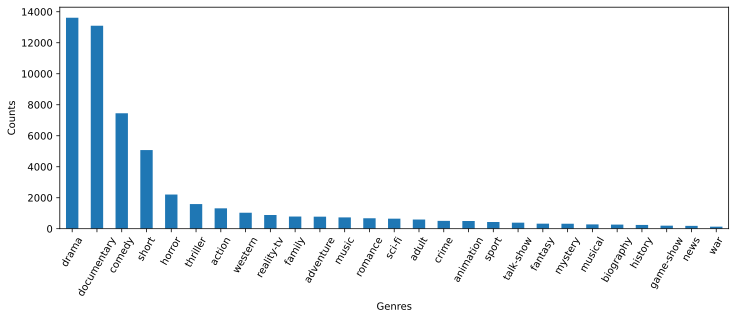

In [16]:
train.genre.value_counts().plot(kind='bar',figsize=(12,4),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("Genres",fontsize=10)
plt.ylabel("Counts",fontsize=10)

### TEST

In [17]:
test = pd.read_csv(DATA_PATH+'test.csv',)
test.head()

,name,text
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


# MODEL 
we build our solution based on the documentation [https://ludwig-ai.github.io/ludwig-docs/examples/](https://ludwig-ai.github.io/ludwig-docs/examples/)

There are many ready-made solutions for text classification available in Ludwig.  
We take BERT tk now this is one of the best language models: [https://habr.com/ru/post/436878/](https://habr.com/ru/post/436878/)

[And another article from Ludwig where models are compared](https://medium.com/ludwig-ai/the-complete-guide-to-sentiment-analysis-with-ludwig-part-ii-d9f3952a06c6)
<img src="http://www.aitimes.kr/news/photo/201901/13117_13465_1541.jpg" width="600">

In [19]:
config = {
    "input_features": [
        {
            "name": "text",
            "type": "text",
            'encoder': 'bert',
        },
        {
            "name": "name",
            "type": "text",
            'encoder': 'bert',
        }
    ],
    "output_features": [
        {
            "name": "genre",
            "type": "category",
        }
    ],
    'training': {
        'batch_size': 32,
        'decay': True,
        'trainable': True,
        'learning_rate': 0.0001,
        'epochs': 4
    }
    
}

In [20]:
bert = LudwigModel(config, logging_level=50,)

In [21]:
%%time
print("Training Model...")
train_stats_bert, _, _ = bert.train(
    train,   
    model_name='bert',
    skip_save_processed_input=True,
    random_seed=42
    )

Training Model...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are in

ResourceExhaustedError: Graph execution error:

Detected at node 'ecd/text_input_feature/bert_encoder/tf_bert_model/bert/encoder/layer_._11/intermediate/dense/Tensordot/MatMul' defined at (most recent call last):
    File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app = cls.instance(**kwargs)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_23/1973584128.py", line 1, in <module>
      get_ipython().run_cell_magic('time', '', 'print("Training Model...")\ntrain_stats_bert, _, _ = bert.train(\n    train,   \n    model_name=\'bert\',\n    skip_save_processed_input=True,\n    random_seed=42\n    )\n')
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2473, in run_cell_magic
      result = fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/decorator.py", line 232, in fun
      return caller(func, *(extras + args), **kw)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/magic.py", line 187, in <lambda>
      call = lambda f, *a, **k: f(*a, **k)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/magics/execution.py", line 1335, in time
      exec(code, glob, local_ns)
    File "<timed exec>", line 6, in <module>
    File "/opt/conda/lib/python3.7/site-packages/ludwig/api.py", line 487, in train
      save_path=model_dir,
    File "/opt/conda/lib/python3.7/site-packages/ludwig/models/trainer.py", line 550, in train
      self.regularization_lambda
    File "/opt/conda/lib/python3.7/site-packages/ludwig/models/ecd.py", line 176, in train_step
      model_outputs = self((inputs, targets), training=True)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/ludwig/models/ecd.py", line 99, in call
      for input_feature_name, input_values in inputs.items():
    File "/opt/conda/lib/python3.7/site-packages/ludwig/models/ecd.py", line 101, in call
      encoder_output = encoder(input_values, training=training,
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/ludwig/features/text_feature.py", line 256, in call
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/ludwig/encoders/text_encoders.py", line 82, in call
      transformer_outputs = self.transformer({
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/transformers/modeling_tf_utils.py", line 1087, in run_call_with_unpacked_inputs
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 1114, in call
      outputs = self.bert(
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/transformers/modeling_tf_utils.py", line 1087, in run_call_with_unpacked_inputs
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 870, in call
      encoder_outputs = self.encoder(
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 556, in call
      for i, layer_module in enumerate(self.layer):
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 562, in call
      layer_outputs = layer_module(
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 518, in call
      intermediate_output = self.intermediate(hidden_states=attention_output)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/transformers/models/bert/modeling_tf_bert.py", line 421, in call
      hidden_states = self.dense(inputs=hidden_states)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/layers/core/dense.py", line 244, in call
      outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])
Node: 'ecd/text_input_feature/bert_encoder/tf_bert_model/bert/encoder/layer_._11/intermediate/dense/Tensordot/MatMul'
OOM when allocating tensor with shape[8192,3072] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node ecd/text_input_feature/bert_encoder/tf_bert_model/bert/encoder/layer_._11/intermediate/dense/Tensordot/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_step_57521]

In [22]:
predictions, _ = bert.predict(test)

In [23]:
predictions

,genre_predictions,genre_probabilities_<UNK>,genre_probabilities_drama,genre_probabilities_documentary,genre_probabilities_comedy,genre_probabilities_short,genre_probabilities_horror,genre_probabilities_thriller,genre_probabilities_action,genre_probabilities_western,...,genre_probabilities_talk-show,genre_probabilities_fantasy,genre_probabilities_mystery,genre_probabilities_musical,genre_probabilities_biography,genre_probabilities_history,genre_probabilities_game-show,genre_probabilities_news,genre_probabilities_war,genre_probability
0,sci-fi,0.010894,0.081613,0.027601,0.012787,0.049450,0.017376,0.088001,0.031018,0.022707,...,0.046692,0.104830,0.016705,0.011190,0.025953,0.019642,0.061797,0.029868,0.003939,0.140140
1,sci-fi,0.014191,0.089762,0.030254,0.012417,0.045297,0.017451,0.077038,0.024265,0.024383,...,0.053613,0.107247,0.015521,0.011428,0.022493,0.022259,0.082082,0.034735,0.004107,0.117189
2,thriller,0.017529,0.063952,0.033921,0.010467,0.044055,0.019446,0.112132,0.024661,0.031138,...,0.051034,0.099893,0.021388,0.009832,0.017530,0.032161,0.069071,0.032965,0.003933,0.112132
3,sci-fi,0.012811,0.060874,0.037586,0.010793,0.039438,0.017199,0.097012,0.022475,0.031157,...,0.037799,0.094562,0.024195,0.010752,0.024616,0.024259,0.089294,0.032048,0.004505,0.128920
4,drama,0.032271,0.093647,0.043869,0.011442,0.027398,0.022287,0.088953,0.027273,0.026943,...,0.034868,0.073481,0.018912,0.009825,0.030203,0.031032,0.075428,0.035356,0.002723,0.093647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54195,thriller,0.026318,0.052651,0.042459,0.013554,0.025726,0.025310,0.082181,0.018621,0.048897,...,0.049218,0.070559,0.033361,0.013669,0.033394,0.049278,0.046185,0.038164,0.005374,0.082181
54196,sci-fi,0.016146,0.082480,0.025253,0.017597,0.046502,0.018685,0.077075,0.031694,0.030148,...,0.045159,0.093439,0.011554,0.009770,0.030378,0.028993,0.042220,0.036445,0.003091,0.132382
54197,thriller,0.010278,0.057140,0.023143,0.013903,0.058935,0.020438,0.119780,0.020125,0.025599,...,0.046659,0.090773,0.022685,0.012009,0.021182,0.026806,0.071335,0.035582,0.005570,0.119780
54198,animation,0.028429,0.050991,0.042943,0.015972,0.012454,0.042023,0.051256,0.015342,0.022341,...,0.069477,0.042035,0.020826,0.016693,0.043465,0.041001,0.032105,0.024298,0.008518,0.101367


In [24]:
submission = pd.DataFrame({'id':range(1, len(predictions)+1),
                           'genre':predictions['genre_predictions'].values},
                          columns=['id', 'genre'])
submission.to_csv('submission.csv', index=False)
submission.head()

,id,genre
0,1,sci-fi
1,2,sci-fi
2,3,thriller
3,4,sci-fi
4,5,drama


# Total:
### That's how with minimal code we have the best solution!

# What can be done to improve the result:
* Read the official [doc](https://ludwig-ai.github.io/ludwig-docs /)
* Add a name to the model
* Pick up other [models](https://ludwig-ai.github.io/ludwig-docs/user_guide/#bert-encoder )
* Choose a training policy